# Data Science Lab: Lab 6

Submit:

A pdf of your notebook with solutions.
A link to your colab notebook or also upload your .ipynb if not working on colab.

# Goals of this Lab

**Fully Connected Models and XOR**


1. How to create data objects that pytorch can use
2. How to create a dataloader
3. How to define a basic fully connected single layer model
4. How to define a multi-layer fully connected model
5. How to add non-linear activation functions.
6. How to add layers in two different ways

We also see the importance of nonlinear activation functions directly, by experimenting with the simple 4-data-point XOR example that we saw in class.

We also see that neural networks are fundamentally different than, say, logistic regression or linear regression, in that they can get stuck in local minima. A simple way to say this is that a different random seed may lead to a different solution.

We explore how capacity (the size of the neural network) could affect this situation.

**Note:** Make sure that you fix a random seed so that you can replicate your solutions. This is always a good practice, and in particular important here, as we see below.

In [2]:
import torch
import numpy as np
import time
from tqdm.notebook import tqdm

# First we define a linear regressor.
This is the same as a fully connected layer. It will be a building block in making deeper neural networks with fully connected layers.

In [3]:
# We define our first class: LinearRegressor
#
class LinearRegressor(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        """
        Define the layer(s) needed for the linear model.
        """
        super().__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim, bias = True) # just linear

    def forward(self, x):
        """
        Calculate the regression score (MSE).

        Input:
            x (float tensor N x d): input rows
        Output:
            y (float tensor N x 1): regression output
        """
        x = self.linear(x)
        return torch.flatten(x)


    # defining a separate predict function is useful for multi-class
    # classification as we will see later. Here it is
    # unnecessary.

    def predict(self, x):
        """
        Predict the regression label of the input vector.

        Input:
            x (float tensor N X d): input images
        Output:
            y (float tensor N x 1): regression output
        """
        x = self.linear(x)
        return torch.flatten(x)




## Problem 1:

Now you will use torch.nn.Sequential (see https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) to construct a two layer neural network, with two fully connected layers (no non-linearity yet). Thus, you will combine torch.nn.Sequential with torch.nn.Linear that you saw above.


Design your network so that the first layer has as many neurons as the input.

Note: you have only one line to fill in here.

In [4]:
class TwoLayerLinearRegressor(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        """
        Define a model that stacks two linear fully connected layers.
        """
        super().__init__()
        self.TLL = torch.nn.Sequential(
            torch.nn.Linear(input_dim, input_dim),
            torch.nn.Linear(input_dim, output_dim)
        )# TO DO: complete this equality, using torch.nn.Sequential

    def forward(self, x):
        """
        Calculate the regression score (MSE).

        Input:
            x (float tensor N x d): input rows
        Output:
            y (float tensor N x 1): regression output
        """
        x = self.TLL(x)
        return torch.flatten(x)

    def predict(self, x):
        """
        Predict the regression label of the input vector.

        Input:
            x (float tensor N X d): input images
        Output:
            y (float tensor N x 1): regression output
        """
        x = self.TLL(x)
        return torch.flatten(x)






## Problem 2

Now you will create the same network, but using different syntax: you will not use torch.nn.Sequential. You need to fill in the two lines as noted by the comments.

In [5]:
class TwoLayerLinearRegressor2(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        """
        Define a model that stacks two linear fully connected layers.
        """
        super().__init__()
        self.fc1 = torch.nn.Linear(input_dim, input_dim) # TO DO
        self.fc2 = torch.nn.Linear(input_dim, output_dim) # TO DO

    def forward(self, x):
        """
        Calculate the regression score (MSE).

        Input:
            x (float tensor N x d): input rows
        Output:
            y (float tensor N x 1): regression output
        """

        x = self.fc1(x)
        x = self.fc2(x)
        return torch.flatten(x)

    def predict(self, x):
        """
        Predict the regression label of the input vector.

        Input:
            x (float tensor N X d): input images
        Output:
            y (float tensor N x 1): regression output
        """
        x = self.fc1(x)
        x = self.fc2(x)
        return torch.flatten(x)


## Problem 3

Now you will define a 2 layer neural network with ReLU activation at the first layer. In other words:

Let $x$ be the input.
Then writing $z = Wx + c$, $h=$ReLU$(z)$ is the first layer's neurons. Then the output is $y = w\cdot z+d$.

Create this neural network using the torch.nn.Sequential command. Conceptually, it may help to realize that this neural network is: a fully connected layer followed by a ReLU, followed by a fully connected layer.

Also see: https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html

Note: You have only one line to fill in here.

In [72]:
# class TwoLayerNonLinearRegressor(torch.nn.Module):
#     def __init__(self, input_dim, output_dim, hidden_dim=10):
#         """
#         Define a model that has a linear layer, a ReLU layer and another linear layer.
#         """
#         super().__init__()
#         self.linear = torch.nn.Sequential(
#             torch.nn.Linear(input_dim, input_dim),
#             torch.nn.ReLU(),
#             torch.nn.Linear(input_dim, output_dim)
#         )# TO DO

#     def forward(self, x):
#         """
#         Calculate the regression score (MSE).

#         Input:
#             x (float tensor N x d): input rows
#         Output:
#             y (float tensor N x 1): regression output
#         """
#         x = self.linear(x)
#         return torch.flatten(x)

#     def predict(self, x):
#         """
#         Predict the regression label of the input vector.

#         Input:
#             x (float tensor N X d): input images
#         Output:
#             y (float tensor N x 1): regression output
#         """
#         x = self.linear(x)
#         return torch.flatten(x)

class TwoLayerNonLinearRegressor(torch.nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim=10):
        """
        Define a model that has a linear layer, a ReLU layer and another linear layer.
        """
        super().__init__()
        self.linear = torch.nn.Sequential(
            torch.nn.Linear(input_dim, hidden_dim),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_dim, output_dim)
        )# TO DO

    def forward(self, x):
        """
        Calculate the regression score (MSE).

        Input:
            x (float tensor N x d): input rows
        Output:
            y (float tensor N x 1): regression output
        """
        x = self.linear(x)
        return torch.flatten(x)

    def predict(self, x):
        """
        Predict the regression label of the input vector.

        Input:
            x (float tensor N X d): input images
        Output:
            y (float tensor N x 1): regression output
        """
        x = self.linear(x)
        return torch.flatten(x)

## Problem 4

Do this one more time, but now without torch.nn.Sequential.

You have three lines to fill in here.

In [73]:
# We now do this again, without using nn.sequential
# in order to illustrate different syntax.

# class TwoLayerNonLinearRegressor2(torch.nn.Module):
#     def __init__(self, input_dim, output_dim, hidden_dim=10):
#         """
#         Define a model that has a linear layer, a ReLU layer and another linear layer.
#         """
#         super().__init__()
#         self.fc1 = torch.nn.Linear(input_dim, input_dim) # TO DO
#         self.relu = torch.nn.ReLU() # TO DO
#         self.fc2 = torch.nn.Linear(input_dim, output_dim) # TO DO

#     def forward(self, x):
#         """
#         Calculate the regression score (MSE).

#         Input:
#             x (float tensor N x d): input rows
#         Output:
#             y (float tensor N x 1): regression output
#         """

#         x = self.fc1(x)
#         x = self.relu(x)
#         x = self.fc2(x)
#         return torch.flatten(x)

#     def predict(self, x):
#         """
#         Predict the regression label of the input vector.

#         Input:
#             x (float tensor N X d): input images
#         Output:
#             y (float tensor N x 1): regression output
#         """
#         x = self.fc1(x)
#         x = self.relu(x)
#         x = self.fc2(x)
#         return torch.flatten(x)

class TwoLayerNonLinearRegressor2(torch.nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim=10):
        """
        Define a model that has a linear layer, a ReLU layer and another linear layer.
        """
        super().__init__()
        self.fc1 = torch.nn.Linear(input_dim, hidden_dim) # TO DO
        self.relu = torch.nn.ReLU() # TO DO
        self.fc2 = torch.nn.Linear(hidden_dim, output_dim) # TO DO

    def forward(self, x):
        """
        Calculate the regression score (MSE).

        Input:
            x (float tensor N x d): input rows
        Output:
            y (float tensor N x 1): regression output
        """

        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return torch.flatten(x)

    def predict(self, x):
        """
        Predict the regression label of the input vector.

        Input:
            x (float tensor N X d): input images
        Output:
            y (float tensor N x 1): regression output
        """
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return torch.flatten(x)

## Problem 5 (Nothing to turn in)

Read the documentation https://pytorch.org/docs/stable/optim.html to see what are the options pytorch provides for an optimizer, and what the parameters are.

## Problem 6

Explain what the code


```
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
```
and


```
model.to(device)
x = x.to(device)
y = y.to(device)
```

does. This does not have to be a completely rigorous definition -- just explain enough to make clear that you understand what the code is doing and why it's important.



The first line checks if there is a CUDA-enabled GPU on the device and will run subsequent models using that if there is, otherwise it will just use the CPU. GPU's often speed up training with parallelism so it's beneficial to use it if available. The following lines moves the model's parameters to the specified device as well as the input data X and labels y.

## Problem 7

Modify the code below for the training loop, so that in addition to training, you output a curve of the training error over each epoch.

In [57]:
# Now we define a function for training
# Note each of the arguments that it takes
import matplotlib.pyplot as plt

def train(model, data_train, data_val, device, lr=0.01, epochs=5000):
    """
    Train the model.

    Input:
      model (torch.nn.Module): the model to train
      data_train (torch.utils.data.Dataloader): yields batches of data
      data_val (torch.utils.data.Dataloader): use this to validate your model
      device (torch.device): which device to use to perform computation

      (optional) lr: learning rate hyperparameter
      (optional) epochs: number of passes over dataloader
    """

    # Setup the loss function to use: mean squared error
    loss_function = torch.nn.MSELoss(reduction = 'sum')

    # Setup the optimizer -- just generic ADAM
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    train_losses = []

    # Wrap in a progress bar.
    for epoch in tqdm(range(epochs)):
        # Set the model to training mode.
        model.train()
        train_loss = 0

        for x, y in data_train:
            x = x.to(device)
            y = y.to(device)

            # Forward pass through the network
            output = model(x)

            # Compute loss
            loss = loss_function(output, y)
            # losses.append(loss)
            # update model weights.
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        train_loss /= len(data_train)
        train_losses.append(train_loss + 1e-8)

        # Set the model to eval mode and compute accuracy.
        model.eval()

        accuracys_val = list()

        for x, y in data_val:
            x = x.to(device)
            y = y.to(device)

            y_pred = model.predict(x)
    
    # Plotting the training loss vs epoch
    plt.plot(train_losses)  # Plot the array
    plt.xlabel('# of Epochs')
    plt.ylabel('Training Error')
    plt.title('Training Error vs. Num Epochs')
    plt.grid(True)  # Optional: adds gridlines for better readability
    plt.show()

In [58]:
# We write a function that takes a model, evaluate on the validation
# data set and returns the predictions

def evaluate_model(model,data_val,device):
  model.eval()
  output_vals = list()
  accuracys_val = list()
  for x, y in data_val:
            x = x.to(device)
            y = y.to(device)

            y_pred = model.predict(x)
            output_vals.append(y_pred)
            # accuracy_val = (y_pred == y).float().mean().item()
            # accuracys_val.append(accuracy_val)

  # accuracy = torch.FloatTensor(accuracys_val).mean().item()
  return output_vals

## Problem 8 (Nothing to turn in)

Read the documentation and try to understand what a dataloader is. You can start here https://pytorch.org/docs/stable/data.html but there are many tutorials out there as well.

In [59]:
# Creating the data: Linear Regression on Linear Data
from torch.utils.data import TensorDataset, DataLoader
N = 15
X = np.random.randn(N,3)
beta = np.array([1,-1,2])
Y = np.dot(X,beta)
tensor_x = torch.Tensor(X) # transform to torch tensor
tensor_y = torch.Tensor(Y)
print('These are the labels:\n',Y)
print('These are the features:\n',X)

m = 1 # Batch size
data = TensorDataset(tensor_x,tensor_y) # create your datset
data_train = DataLoader(data,batch_size = m, shuffle = True) # create your dataloader with training data
data_val = DataLoader(data) # create your dataloader with validation data, here same as training

These are the labels:
 [-5.41805261 -0.23871564 -1.65157159  2.06145283 -2.87754666  2.44299304
  2.95593818 -3.00917018 -0.44978327  0.88465565  7.62371768  0.84221837
 -0.70296601  3.20739224  0.44056539]
These are the features:
 [[ 0.41207879  1.05029515 -2.38991813]
 [ 0.66175816 -1.17739677 -1.03893529]
 [-0.53621537 -1.02667193 -1.07101407]
 [ 0.70619443  1.49340297  1.42433068]
 [-0.2012636   2.00039439 -0.33794434]
 [-0.38952073 -0.23812642  1.29719367]
 [ 0.22930745 -1.19727052  0.76468011]
 [-0.34207015  0.28802385 -1.18953809]
 [ 0.78662583  1.36818198  0.06588644]
 [-0.27216616  1.91787583  1.53734882]
 [ 0.46488202 -0.54202115  3.30840725]
 [-0.28234046 -0.31696533  0.40379675]
 [ 0.3418384   0.74454836 -0.15012803]
 [ 0.55778906 -0.10273439  1.27343439]
 [ 1.31424426  0.27712485 -0.29827701]]


## Now we train and evaluate the linear model.

  0%|          | 0/5000 [00:00<?, ?it/s]

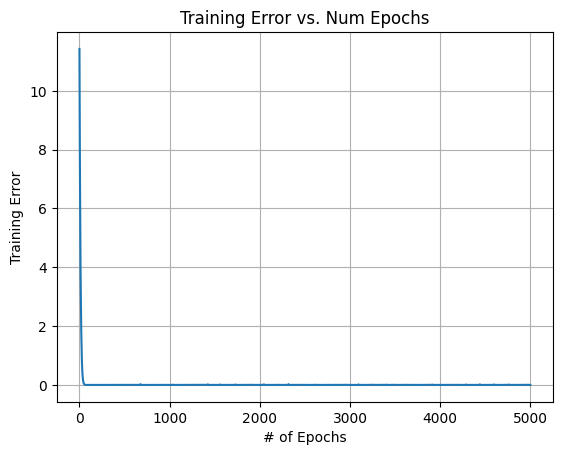

In [60]:
# Define the model we wish to use, and train it.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = LinearRegressor(3, 1)
model.to(device)

train(model, data_train, data_val, device)

## Here is some code for getting the parameters of the model.

In [61]:
# Now let's get the model parameters.
# We can see that we have succeeded in learning beta: [1,-1,2]
for name, param in model.named_parameters():
  print (name, param.data)

# If we wanted to, we could also only print the ones that we update (may be useful for more complex models)
"""
for name, param in model.named_parameters():
    if param.requires_grad:
        print (name, param.data)
"""

linear.weight tensor([[ 1.0002, -1.0003,  2.0000]])
linear.bias tensor([4.0154e-05])


'\nfor name, param in model.named_parameters():\n    if param.requires_grad:\n        print (name, param.data)\n'

  0%|          | 0/5000 [00:00<?, ?it/s]

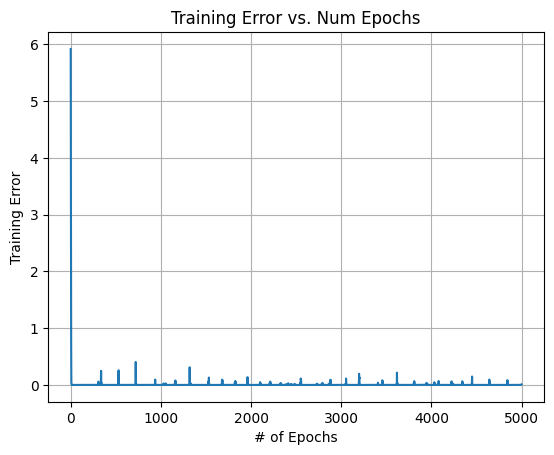

In [62]:
# Now let's move to our second model: the two layer linear regressor.
# We again define the model using the class we created.
# Then we train the model, as above.

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model2 = TwoLayerLinearRegressor(3, 1)
model2.to(device)

train(model2, data_train, data_val, device)

In [63]:
# Let's see how well this model agrees with the training data
output_values = evaluate_model(model2,data_val,device)
print('Ground Truth:\n',Y)
print('Model Output:\n',output_values)

Ground Truth:
 [-5.41805261 -0.23871564 -1.65157159  2.06145283 -2.87754666  2.44299304
  2.95593818 -3.00917018 -0.44978327  0.88465565  7.62371768  0.84221837
 -0.70296601  3.20739224  0.44056539]
Model Output:
 [tensor([-5.4509], grad_fn=<ViewBackward0>), tensor([-0.2557], grad_fn=<ViewBackward0>), tensor([-1.7009], grad_fn=<ViewBackward0>), tensor([2.1187], grad_fn=<ViewBackward0>), tensor([-2.8771], grad_fn=<ViewBackward0>), tensor([2.4530], grad_fn=<ViewBackward0>), tensor([2.9639], grad_fn=<ViewBackward0>), tensor([-3.0445], grad_fn=<ViewBackward0>), tensor([-0.4192], grad_fn=<ViewBackward0>), tensor([0.9209], grad_fn=<ViewBackward0>), tensor([7.6959], grad_fn=<ViewBackward0>), tensor([0.8361], grad_fn=<ViewBackward0>), tensor([-0.6943], grad_fn=<ViewBackward0>), tensor([3.2440], grad_fn=<ViewBackward0>), tensor([0.4690], grad_fn=<ViewBackward0>)]


# The XOR Data Set
We see that linear layers do not suffice.

In [64]:
"""
Here we create the simple XOR data set an a numpy array.
Then we make X and Y into tensor objects that torch uses,
and we package it into a Dataset object called data.
Then we create a DataLoader.
"""

Xxor = np.array([[0,0],[0,1],[1,0],[1,1]])
Yxor = np.array([0,1,1,0])
tensor_xxor = torch.Tensor(Xxor) # transform to torch tensor
tensor_yxor = torch.Tensor(Yxor)
print('These are the labels:\n',Yxor)
print('These are the features:\n',Xxor)

dataxor = TensorDataset(tensor_xxor,tensor_yxor) # create your datset
dataxor_train = DataLoader(dataxor) # create your dataloader with training data
dataxor_val = DataLoader(dataxor) # create your dataloader with validation data, here same as training

These are the labels:
 [0 1 1 0]
These are the features:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]


## Problem 9

Train your linear regressor on these data. Now see how well you do, by evaluating your solution on the training data.

Print your output. Do you get the right values?

  0%|          | 0/5000 [00:00<?, ?it/s]

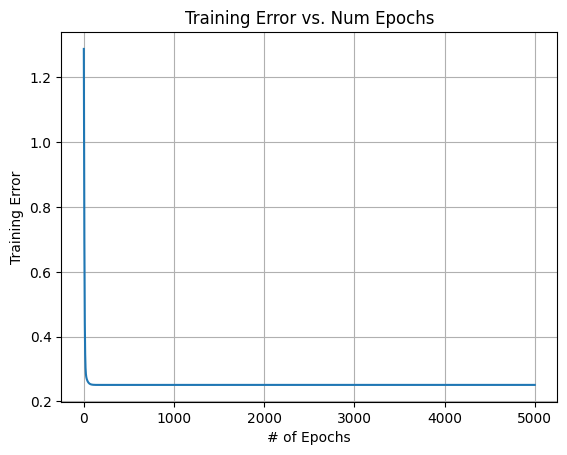

Ground Truth:
 [0 1 1 0]
Model Output:
 [tensor([0.5012], grad_fn=<ViewBackward0>), tensor([0.5006], grad_fn=<ViewBackward0>), tensor([0.5005], grad_fn=<ViewBackward0>), tensor([0.4999], grad_fn=<ViewBackward0>)]


In [65]:
# Now we train a linear classifier on these data.
# We know (and can verify) that this will fail because no linear classifier can succeed

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model3 = LinearRegressor(2, 1)# TO DO
model3.to(device)

# TO DO -- give a command to train your model
train(model3, dataxor_train, dataxor_val, device)
# TO DO -- give a command to evaluate your model
output_values = evaluate_model(model3, dataxor_val, device)

# TO DO -- print the ground truth, and then also print what your model predicts for the 4 points in the training set.
print('Ground Truth:\n',Yxor)
print('Model Output:\n',output_values)

## Problem 10

Now repeat this, but using both versions of your non-linear two-layer model. Thus: train both versions of your non-linear two layer models, and evaluate them on the data.

Remember the values we got in class. We saw that there is a solution -- i.e., a setting for the parameters of the nonlinear model -- so that the network outputs the XOR outputs.

If you got the right values, try a different random seed.
If you didn't get the right values, try changing the random seed to see if you get something different.

  0%|          | 0/5000 [00:00<?, ?it/s]

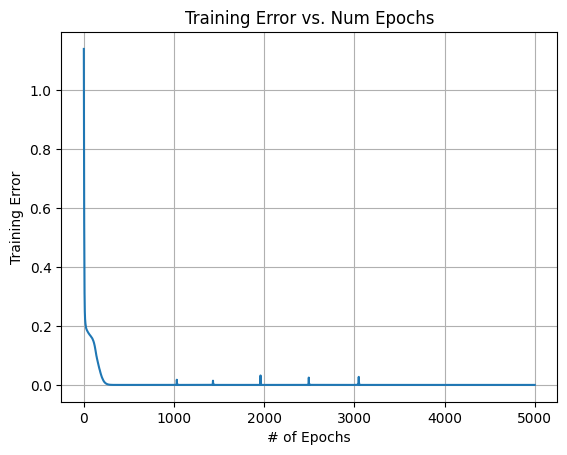

  0%|          | 0/5000 [00:00<?, ?it/s]

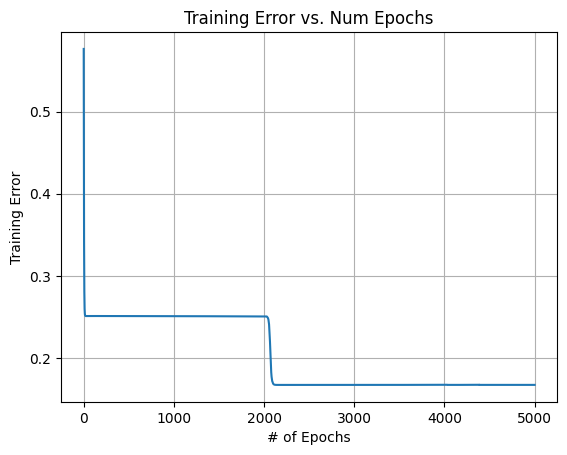

Ground Truth:
 [0 1 1 0]
Model 4 Output:
 [tensor([0.], grad_fn=<ViewBackward0>), tensor([1.], grad_fn=<ViewBackward0>), tensor([1.], grad_fn=<ViewBackward0>), tensor([0.], grad_fn=<ViewBackward0>)]
Model 5 Output:
 [tensor([0.], grad_fn=<ViewBackward0>), tensor([0.6668], grad_fn=<ViewBackward0>), tensor([0.6668], grad_fn=<ViewBackward0>), tensor([0.6668], grad_fn=<ViewBackward0>)]


In [66]:
model4 = TwoLayerNonLinearRegressor(2, 1)
model5 = TwoLayerNonLinearRegressor2(2, 1)

model4.to(device)
model5.to(device)

train(model4, dataxor_train, dataxor_val, device)
train(model5, dataxor_train, dataxor_val, device)

output_values = evaluate_model(model4, dataxor_val, device)

print('Ground Truth:\n',Yxor)
print('Model 4 Output:\n',output_values)

output_values = evaluate_model(model5, dataxor_val, device)
print('Model 5 Output:\n',output_values)

  0%|          | 0/5000 [00:00<?, ?it/s]

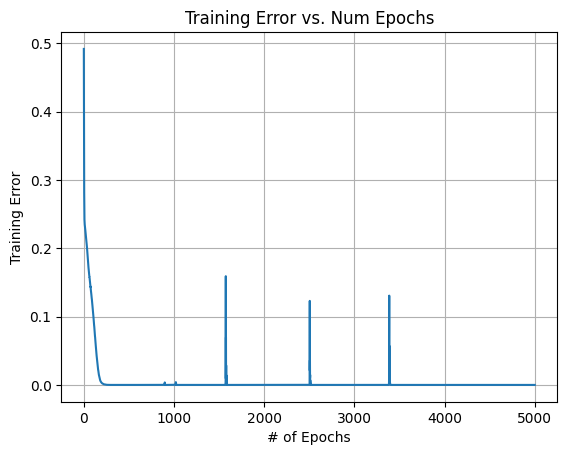

  0%|          | 0/5000 [00:00<?, ?it/s]

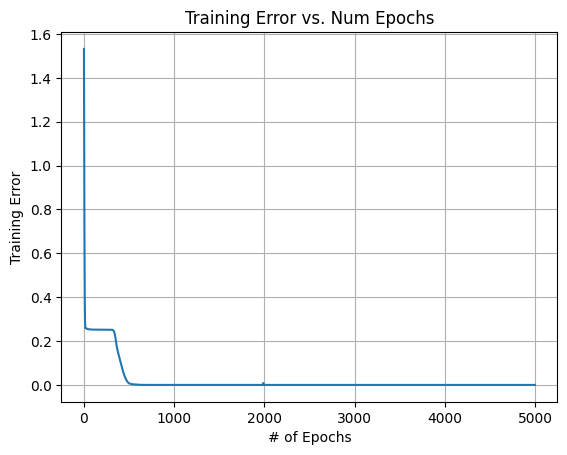

Ground Truth:
 [0 1 1 0]
Model 6 Output:
 [tensor([-6.1657e-44], grad_fn=<ViewBackward0>), tensor([1.], grad_fn=<ViewBackward0>), tensor([1.], grad_fn=<ViewBackward0>), tensor([-6.1657e-44], grad_fn=<ViewBackward0>)]
Model 7 Output:
 [tensor([3.5032e-44], grad_fn=<ViewBackward0>), tensor([1.], grad_fn=<ViewBackward0>), tensor([1.], grad_fn=<ViewBackward0>), tensor([3.5032e-44], grad_fn=<ViewBackward0>)]


In [71]:
# Incorrect answer in the previous question - change the seed to get something different
torch.manual_seed(96)

model6 = TwoLayerNonLinearRegressor(2, 1)
model7 = TwoLayerNonLinearRegressor2(2, 1)

model6.to(device)
model7.to(device)

train(model6, dataxor_train, dataxor_val, device)
train(model7, dataxor_train, dataxor_val, device)

output_values = evaluate_model(model6, dataxor_val, device)

print('Ground Truth:\n',Yxor)
print('Model 6 Output:\n',output_values)

output_values = evaluate_model(model7, dataxor_val, device)
print('Model 7 Output:\n',output_values)

## Problem 11

If you did the above correctly, you will see that the values depend quite a bit on the random seed. In fact, you probably noticed that most random seeds **don't seem to work**.

What is happening here is that we are getting stuck in a local minimum, and our gradient-based method used in the training loop cannot escape from it.

Modify the definition of your non-linear two layer network so that the first layer of neurons (the hidden layer) has more than 2 (say, 10 or 15) neurons. Note that this means your network has more parameters.

Then run it again with different seeds on the XOR training data. Is it easier (i.e., easier to find a random seed that works)?

  0%|          | 0/5000 [00:00<?, ?it/s]

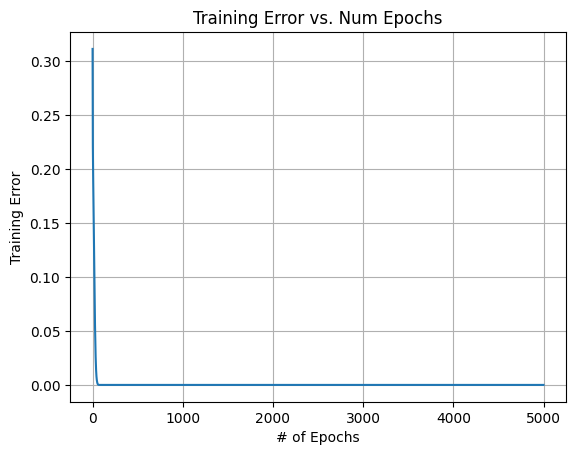

  0%|          | 0/5000 [00:00<?, ?it/s]

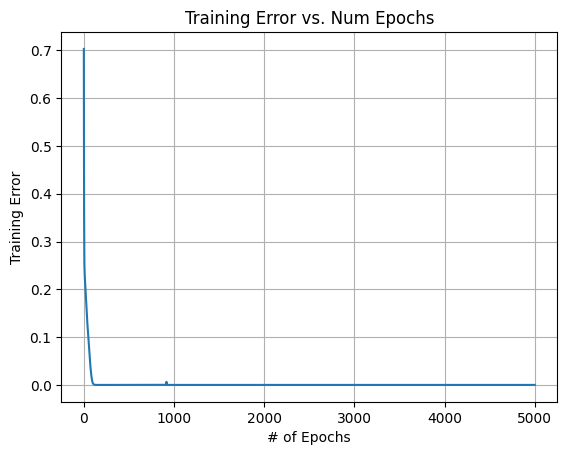

Ground Truth:
 [0 1 1 0]
Model X Output:
 [tensor([0.], grad_fn=<ViewBackward0>), tensor([1.], grad_fn=<ViewBackward0>), tensor([1.], grad_fn=<ViewBackward0>), tensor([0.], grad_fn=<ViewBackward0>)]
Model Y Output:
 [tensor([0.], grad_fn=<ViewBackward0>), tensor([1.], grad_fn=<ViewBackward0>), tensor([1.], grad_fn=<ViewBackward0>), tensor([0.], grad_fn=<ViewBackward0>)]
-----


  0%|          | 0/5000 [00:00<?, ?it/s]

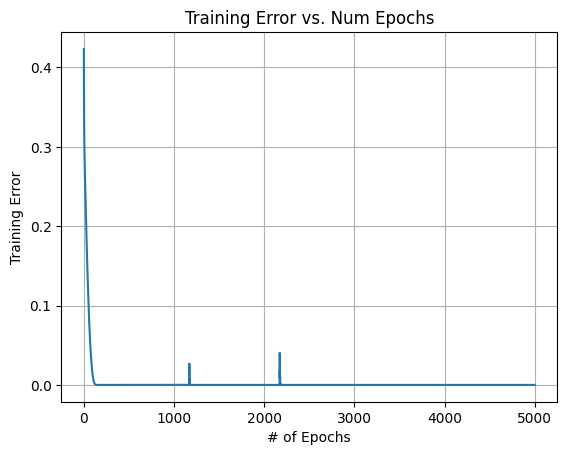

  0%|          | 0/5000 [00:00<?, ?it/s]

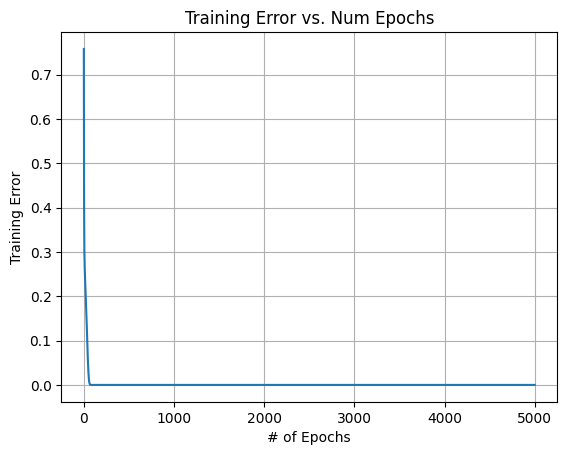

Ground Truth:
 [0 1 1 0]
Model X Output:
 [tensor([0.], grad_fn=<ViewBackward0>), tensor([1.], grad_fn=<ViewBackward0>), tensor([1.], grad_fn=<ViewBackward0>), tensor([0.], grad_fn=<ViewBackward0>)]
Model Y Output:
 [tensor([0.], grad_fn=<ViewBackward0>), tensor([1.], grad_fn=<ViewBackward0>), tensor([1.], grad_fn=<ViewBackward0>), tensor([0.], grad_fn=<ViewBackward0>)]
-----


  0%|          | 0/5000 [00:00<?, ?it/s]

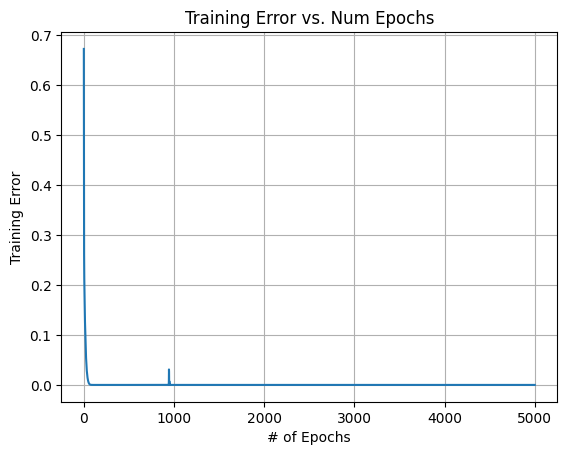

  0%|          | 0/5000 [00:00<?, ?it/s]

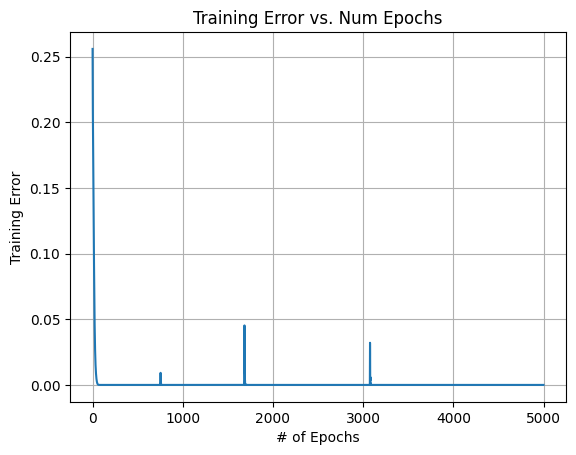

Ground Truth:
 [0 1 1 0]
Model X Output:
 [tensor([0.], grad_fn=<ViewBackward0>), tensor([1.], grad_fn=<ViewBackward0>), tensor([1.], grad_fn=<ViewBackward0>), tensor([0.], grad_fn=<ViewBackward0>)]
Model Y Output:
 [tensor([0.], grad_fn=<ViewBackward0>), tensor([1.], grad_fn=<ViewBackward0>), tensor([1.], grad_fn=<ViewBackward0>), tensor([0.], grad_fn=<ViewBackward0>)]
-----


  0%|          | 0/5000 [00:00<?, ?it/s]

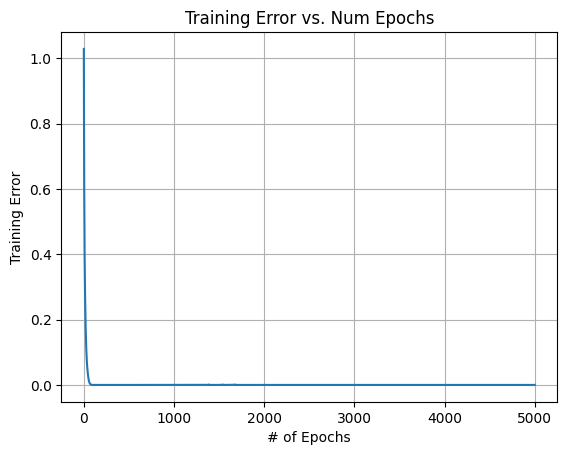

  0%|          | 0/5000 [00:00<?, ?it/s]

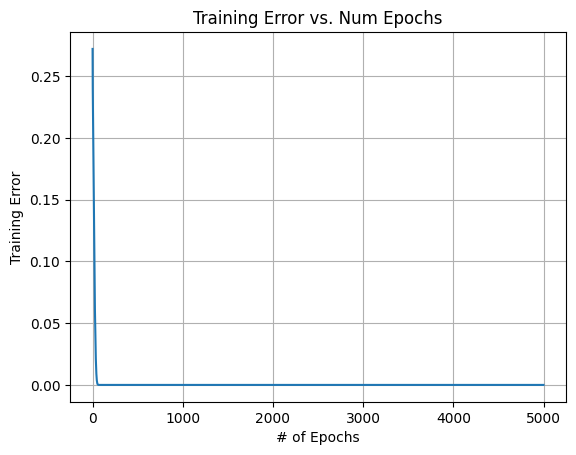

Ground Truth:
 [0 1 1 0]
Model X Output:
 [tensor([1.4013e-44], grad_fn=<ViewBackward0>), tensor([1.], grad_fn=<ViewBackward0>), tensor([1.], grad_fn=<ViewBackward0>), tensor([6.3058e-44], grad_fn=<ViewBackward0>)]
Model Y Output:
 [tensor([0.], grad_fn=<ViewBackward0>), tensor([1.], grad_fn=<ViewBackward0>), tensor([1.], grad_fn=<ViewBackward0>), tensor([0.], grad_fn=<ViewBackward0>)]
-----


  0%|          | 0/5000 [00:00<?, ?it/s]

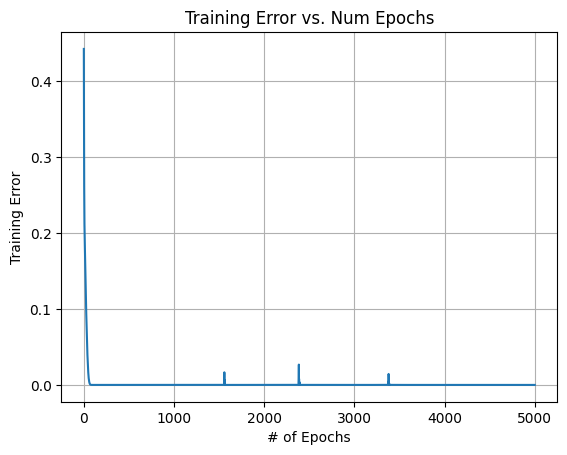

  0%|          | 0/5000 [00:00<?, ?it/s]

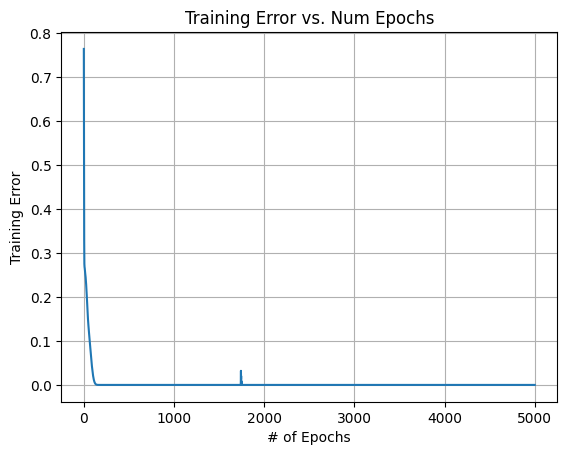

Ground Truth:
 [0 1 1 0]
Model X Output:
 [tensor([-3.6434e-44], grad_fn=<ViewBackward0>), tensor([1.], grad_fn=<ViewBackward0>), tensor([1.], grad_fn=<ViewBackward0>), tensor([-3.6434e-44], grad_fn=<ViewBackward0>)]
Model Y Output:
 [tensor([0.], grad_fn=<ViewBackward0>), tensor([1.], grad_fn=<ViewBackward0>), tensor([1.], grad_fn=<ViewBackward0>), tensor([0.], grad_fn=<ViewBackward0>)]
-----


In [74]:
seeds = [1, 42, 99, 106, 2014]

for seed in seeds:
    torch.manual_seed(seed)

    modelX = TwoLayerNonLinearRegressor(2, 1, 10)
    modelY = TwoLayerNonLinearRegressor2(2, 1, 10)

    modelX.to(device)
    modelY.to(device)

    train(modelX, dataxor_train, dataxor_val, device)
    train(modelY, dataxor_train, dataxor_val, device)

    output_values = evaluate_model(modelX, dataxor_val, device)

    print('Ground Truth:\n',Yxor)
    print('Model X Output:\n',output_values)

    output_values = evaluate_model(modelY, dataxor_val, device)
    print('Model Y Output:\n',output_values)

    print("-----")

Yes, for each of the randomly selected seeds, the models output the ground truth.

## Problem 12

Print the parameters of one of your non-linear models. Thus, you should print: 4 weights plus 2 bias values for the first layer, and then 2 weights plus 1 bias value for the second: 9 parameters in total.

In [75]:
first_layer = model4.linear[0]
relu_layer = model4.linear[1]
second_layer = model4.linear[2]

print("First Layer (fc1) Parameters:")
print("Weights (4 values):")
print(first_layer.weight)
print("Biases (2 values):")
print(first_layer.bias)

print("\nSecond Layer (fc2) Parameters:")
print("Weights (2 values):")
print(second_layer.weight)
print("Bias (1 value):")
print(second_layer.bias)

First Layer (fc1) Parameters:
Weights (4 values):
Parameter containing:
tensor([[ 0.9807, -0.9807],
        [ 1.4050, -1.4077]], requires_grad=True)
Biases (2 values):
Parameter containing:
tensor([ 0.9570, -0.0217], requires_grad=True)

Second Layer (fc2) Parameters:
Weights (2 values):
Parameter containing:
tensor([[-1.0450,  1.4638]], requires_grad=True)
Bias (1 value):
Parameter containing:
tensor([1.], requires_grad=True)
